In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import folium
import numpy as np
import seaborn as sns
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# connect_database 함수 정의
def connect_database(host_name="host_name", user_name="user_name", user_password="user_password"):
    mydb = mysql.connector.connect(
        host=host_name,
        port=3306,
        user=user_name,
        password=user_password,
        database="WAY_BACK_HOME"
    )
    cursor = mydb.cursor()
    return mydb, cursor

# 데이터베이스 연결
mydb, cursor = connect_database()

In [6]:
# 연결 해제하는 코드
cursor.close()  # 커서 닫기
mydb.close()    # 데이터베이스 연결 닫기


In [5]:
# 테이블 목록 조회
cursor.execute("SHOW TABLES")
tables = cursor.fetchall()

# 테이블 이름 출력
for table in tables:
    print(table[0])

ProgrammingError: 2055: Cursor is not connected

In [85]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# 데이터베이스에서 필요한 데이터 가져오는 함수
def fetch_data(query, cursor):
    cursor.execute(query)
    result = cursor.fetchall()
    columns = [i[0] for i in cursor.description]
    df = pd.DataFrame(result, columns=columns)
    return df

### housing_supply에서 공급량 그래프 그리기 

          date  households_count
0   2005-01-01            3309.9
1   2006-01-01            3349.7
2   2007-01-01            3403.2
3   2008-01-01            3453.6
4   2009-01-01            3500.9
5   2010-01-01            3646.5
6   2011-01-01            3673.4
7   2012-01-01            3700.6
8   2013-01-01            3728.2
9   2014-01-01            3756.2
10  2015-01-01            3784.5
11  2016-01-01            3784.7
12  2017-01-01            3813.3
13  2018-01-01            3839.8
14  2019-01-01            3896.4
15  2020-01-01            3982.3
16  2021-01-01            4046.8
17  2022-01-01            4098.8


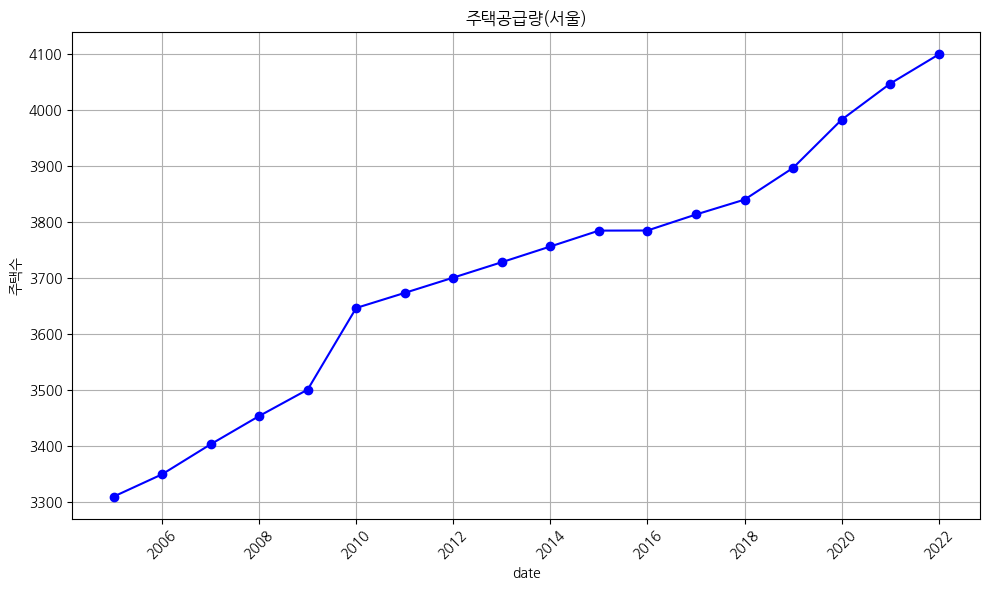

In [86]:
# 쿼리 실행 여기를 수정하면 된다. 19는 서울
query_housing_supply_households_count= """
SELECT date, households_count 
FROM housing_supply  
WHERE region_id LIKE '19'
"""
df_housing_supply_households_count = fetch_data(query_housing_supply_households_count, cursor)

# 데이터 확인
print(df_housing_supply_households_count)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_housing_supply_households_count['date'], df_housing_supply_households_count['households_count'], marker='o', linestyle='-', color='b')
plt.title('주택공급량(서울)')
plt.xlabel('date') #x축
plt.ylabel('주택수') #y축
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

          date  housing_count
0   2005-01-01         3102.2
1   2006-01-01         3151.1
2   2007-01-01         3172.3
3   2008-01-01         3231.7
4   2009-01-01         3258.4
5   2010-01-01         3442.1
6   2011-01-01         3477.8
7   2012-01-01         3509.8
8   2013-01-01         3546.4
9   2014-01-01         3607.6
10  2015-01-01         3633.0
11  2016-01-01         3644.1
12  2017-01-01         3671.5
13  2018-01-01         3682.4
14  2019-01-01         3738.6
15  2020-01-01         3778.4
16  2021-01-01         3811.9
17  2022-01-01         3839.8


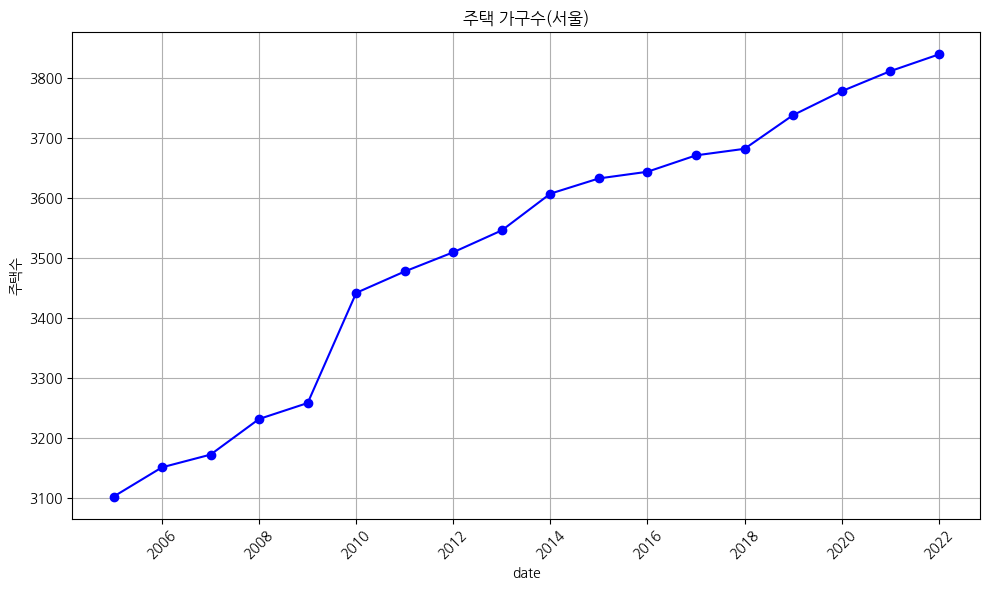

In [87]:
# 쿼리 실행 여기를 수정하면 된다. 19는 서울
query_housing_supply_housing_count= """
SELECT date, housing_count
FROM housing_supply  
WHERE region_id LIKE '19'
"""
df_housing_supply_housing_count = fetch_data(query_housing_supply_housing_count, cursor)

# 데이터 확인
print(df_housing_supply_housing_count)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_housing_supply_housing_count['date'], df_housing_supply_housing_count['housing_count'], marker='o', linestyle='-', color='b')
plt.title('주택 가구수(서울)')
plt.xlabel('date') #x축
plt.ylabel('주택수') #y축
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 공급률

          date  penetration_rate
0   2005-01-01              93.7
1   2006-01-01              94.1
2   2007-01-01              93.2
3   2008-01-01              93.6
4   2009-01-01              93.1
5   2010-01-01              94.4
6   2011-01-01              94.7
7   2012-01-01              94.8
8   2013-01-01              95.1
9   2014-01-01              96.0
10  2015-01-01              96.0
11  2016-01-01              96.3
12  2017-01-01              96.3
13  2018-01-01              95.9
14  2019-01-01              96.0
15  2020-01-01              94.9
16  2021-01-01              94.2
17  2022-01-01              93.7


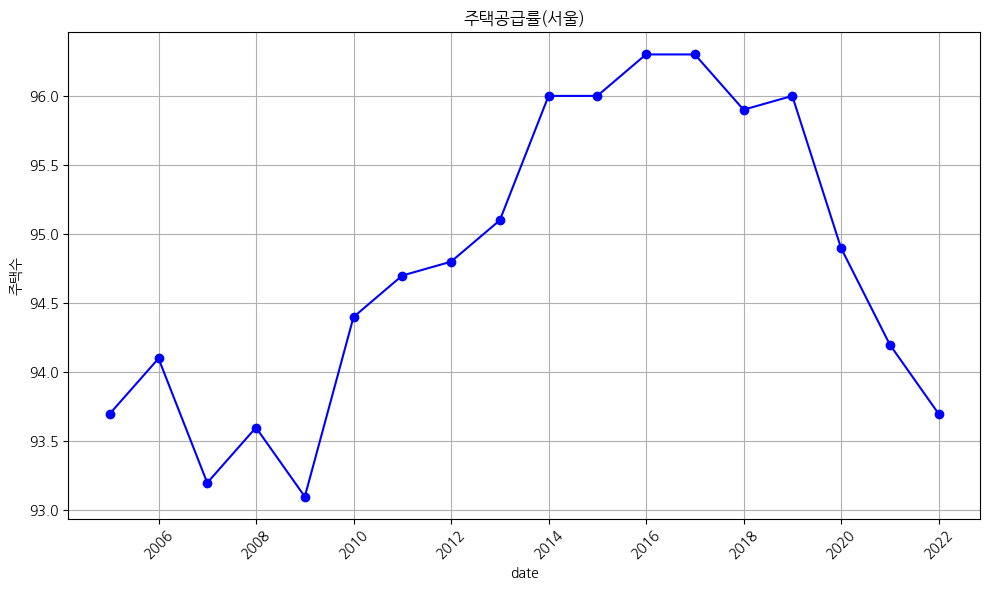

In [98]:
# 쿼리 실행 여기를 수정하면 된다. 19는 서울
query_housing_supply_penetration_rate= """
SELECT date, penetration_rate
FROM housing_supply  
WHERE region_id LIKE '19'
"""
df_housing_supply_penetration_rate = fetch_data(query_housing_supply_penetration_rate, cursor)

# 데이터 확인
print(df_housing_supply_penetration_rate)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_housing_supply_penetration_rate['date'], df_housing_supply_penetration_rate['penetration_rate'], marker='o', linestyle='-', color='b')
plt.title('주택공급률(서울)')
plt.xlabel('date') #x축
plt.ylabel('주택수') #y축
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 전세가격지수 매매가격지수를 겹쳐서 그린 그래프

           date  price_index
0    2003-11-01         52.5
1    2003-12-01         52.1
2    2004-01-01         51.9
3    2004-02-01         52.2
4    2004-03-01         52.5
..          ...          ...
245  2024-04-01         94.0
246  2024-05-01         94.2
247  2024-06-01         94.8
248  2024-07-01         95.9
249  2024-08-01         97.1

[250 rows x 2 columns]
           date  price_index
0    2003-11-01         46.7
1    2003-12-01         46.2
2    2004-01-01         46.0
3    2004-02-01         46.3
4    2004-03-01         46.5
..          ...          ...
245  2024-04-01         87.6
246  2024-05-01         87.9
247  2024-06-01         88.5
248  2024-07-01         89.2
249  2024-08-01         90.0

[250 rows x 2 columns]


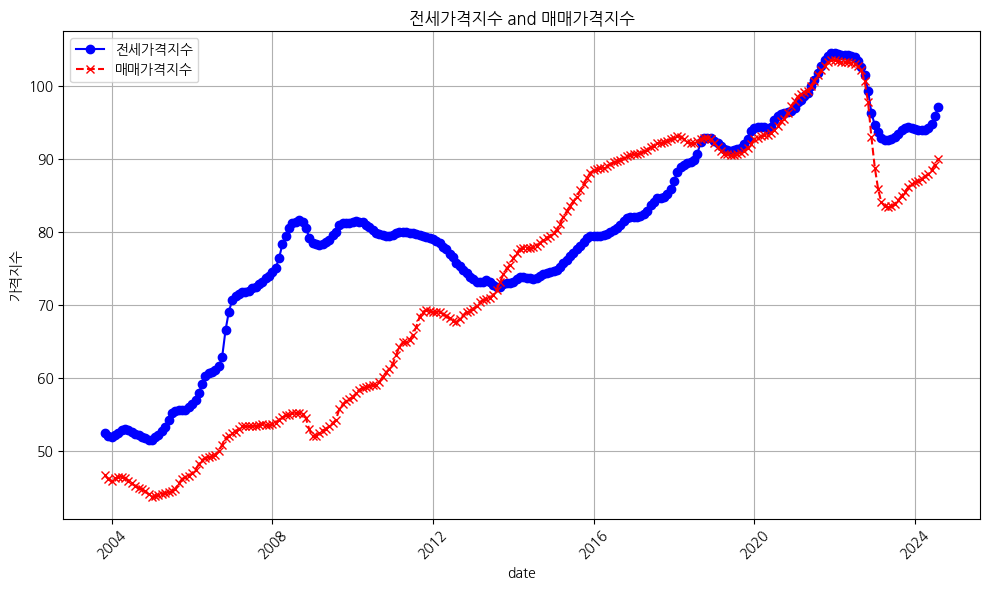

In [88]:
# 전세가격지수 데이터 쿼리
query_jeonse = """
SELECT date, price_index 
FROM jeonse_price_index
WHERE region_id LIKE '19'
"""
df_jeonse = fetch_data(query_jeonse, cursor)

# 매매가격지수 데이터 쿼리
query_maemae = """
SELECT date, price_index 
FROM property_price_index
WHERE region_id LIKE '19'
"""
df_maemae = fetch_data(query_maemae, cursor)

# 데이터 확인
print(df_jeonse)
print(df_maemae)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가격지수 플롯
plt.plot(df_jeonse['date'], df_jeonse['price_index'], marker='o', linestyle='-', color='b', label='전세가격지수')

# 매매가격지수 플롯
plt.plot(df_maemae['date'], df_maemae['price_index'], marker='x', linestyle='--', color='r', label='매매가격지수')

# 그래프 설정
plt.title('전세가격지수 and 매매가격지수')
plt.xlabel('date')
plt.ylabel('가격지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

# 전세가율 2012년부터 2024년 까지

           date    ratio
0    2012-01-01  54.2712
1    2012-02-01  54.4214
2    2012-03-01  54.5465
3    2012-04-01  54.5474
4    2012-05-01  54.7136
..          ...      ...
147  2024-04-01  54.4883
148  2024-05-01  54.6074
149  2024-06-01  54.6468
150  2024-07-01  54.5064
151  2024-08-01  54.2920

[152 rows x 2 columns]


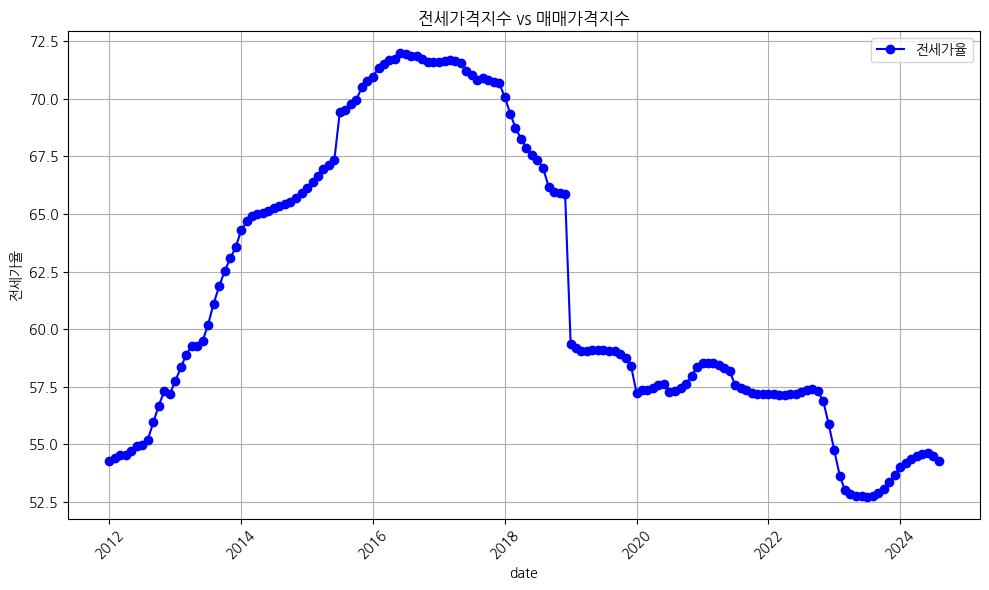

In [89]:
# 전세가율 쿼리
query_jeonse_ratio = """
SELECT date, ratio
FROM property_jeonse_ratio_copy
WHERE region_id LIKE '19'
"""
df_jeonse_ratio = fetch_data(query_jeonse_ratio, cursor)

# 데이터 확인
print(df_jeonse_ratio)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가율 
plt.plot(df_jeonse_ratio['date'], df_jeonse_ratio['ratio'], marker='o', linestyle='-', color='b', label='전세가율')

# 그래프 설정
plt.title('전세가격지수 vs 매매가격지수')
plt.xlabel('date')
plt.ylabel('전세가율')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

# 따라서 전세가격 지수도 2012년 부터 그려보자

           date  price_index
0    2012-01-01         79.0
1    2012-02-01         78.8
2    2012-03-01         78.5
3    2012-04-01         78.0
4    2012-05-01         77.6
..          ...          ...
147  2024-04-01         94.0
148  2024-05-01         94.2
149  2024-06-01         94.8
150  2024-07-01         95.9
151  2024-08-01         97.1

[152 rows x 2 columns]
           date  price_index
0    2012-01-01         69.1
1    2012-02-01         69.1
2    2012-03-01         69.1
3    2012-04-01         68.8
4    2012-05-01         68.5
..          ...          ...
147  2024-04-01         87.6
148  2024-05-01         87.9
149  2024-06-01         88.5
150  2024-07-01         89.2
151  2024-08-01         90.0

[152 rows x 2 columns]


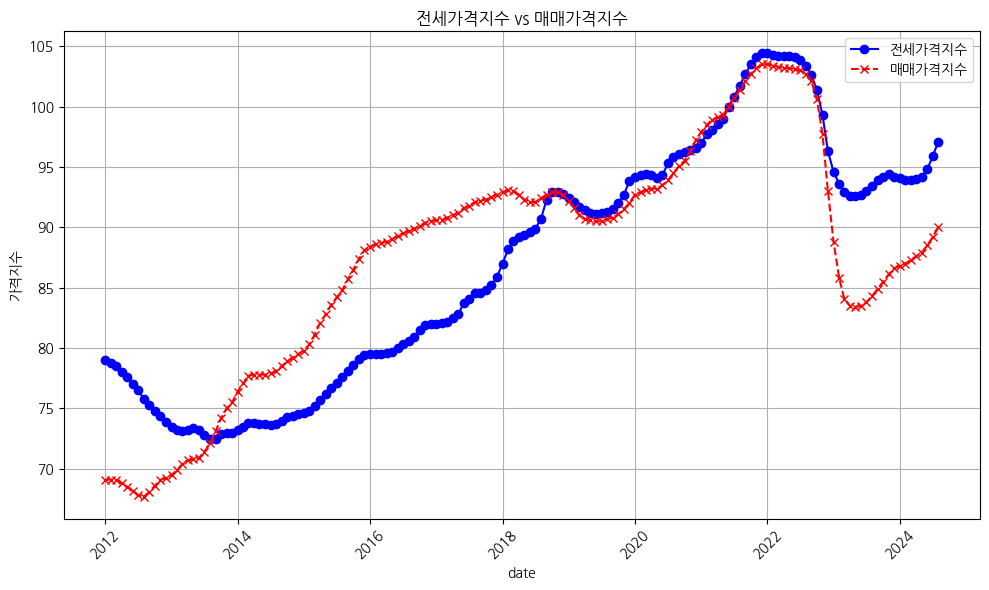

In [90]:
# 전세가격지수 데이터 쿼리
query_jeonse_2012 = """
SELECT date, price_index 
FROM jeonse_price_index
WHERE region_id LIKE '19' and date >= '2012-01-01';
"""
df_jeonse_2012 = fetch_data(query_jeonse_2012, cursor)

# 매매가격지수 데이터 쿼리
query_maemae_2012 = """
SELECT date, price_index 
FROM property_price_index
WHERE region_id LIKE '19' and date >= '2012-01-01'
"""
df_maemae_2012 = fetch_data(query_maemae_2012, cursor)

# 데이터 확인
print(df_jeonse_2012)
print(df_maemae_2012)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가격지수 플롯
plt.plot(df_jeonse_2012['date'], df_jeonse_2012['price_index'], marker='o', linestyle='-', color='b', label='전세가격지수')

# 매매가격지수 플롯
plt.plot(df_maemae_2012['date'], df_maemae_2012['price_index'], marker='x', linestyle='--', color='r', label='매매가격지수')

# 그래프 설정
plt.title('전세가격지수 vs 매매가격지수')
plt.xlabel('date')
plt.ylabel('가격지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

# 이제 연도별 뉴스 갯수를 그래프로 그려보자

           date  count
0    2013-01-01   1740
1    2013-02-01   1605
2    2013-03-01   1951
3    2013-04-01   2081
4    2013-05-01   1516
..          ...    ...
135  2024-04-01   2299
136  2024-05-01   2037
137  2024-06-01   1888
138  2024-07-01   2231
139  2024-08-01   1652

[140 rows x 2 columns]


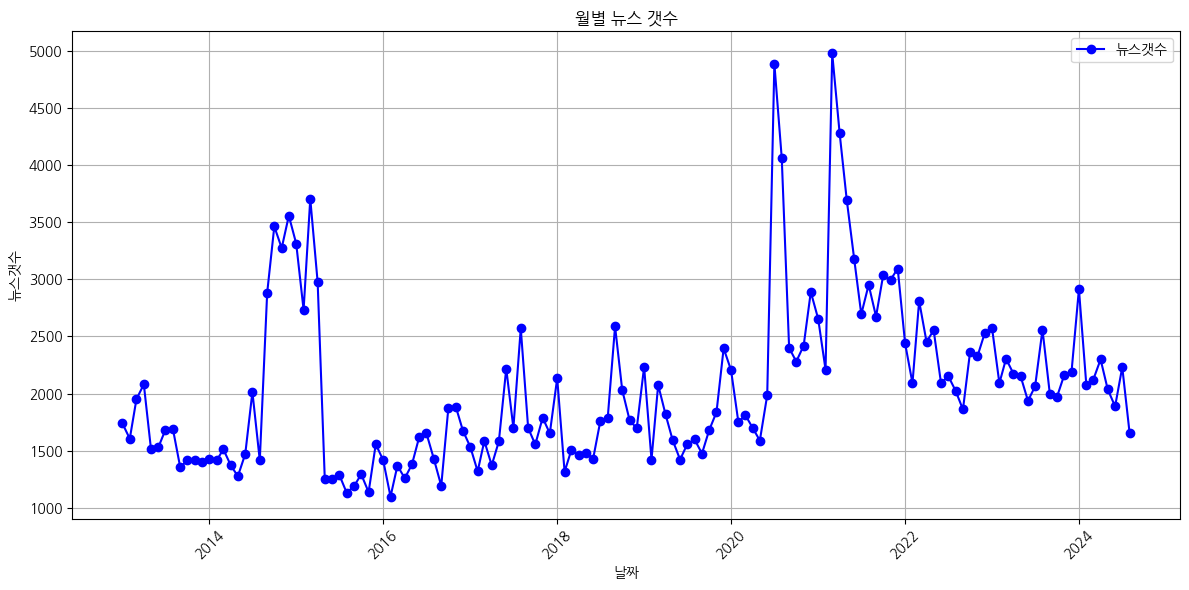

In [91]:
# 뉴스 쿼리  # 8월 데이터가 튀는거같다.
query_news = """
SELECT date, count(date) as count
FROM news_titles_copy
where date
GROUP BY date
"""
df_news = fetch_data(query_news, cursor)

# 데이터 확인
print(df_news)
# 데이터 형식 확인 (필요한 경우)
df_news['date'] = pd.to_datetime(df_news['date'])

plt.figure(figsize=(12, 6))
plt.plot(df_news['date'], df_news['count'], marker='o', linestyle='-', color='b', label='뉴스갯수')
plt.title('월별 뉴스 갯수')
plt.xlabel('날짜')
plt.ylabel('뉴스갯수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

           date  count
0    2013-01-01   1740
1    2013-02-01   1605
2    2013-03-01   1951
3    2013-04-01   2081
4    2013-05-01   1516
..          ...    ...
135  2024-04-01   2299
136  2024-05-01   2037
137  2024-06-01   1888
138  2024-07-01   2231
139  2024-08-01   1652

[140 rows x 2 columns]


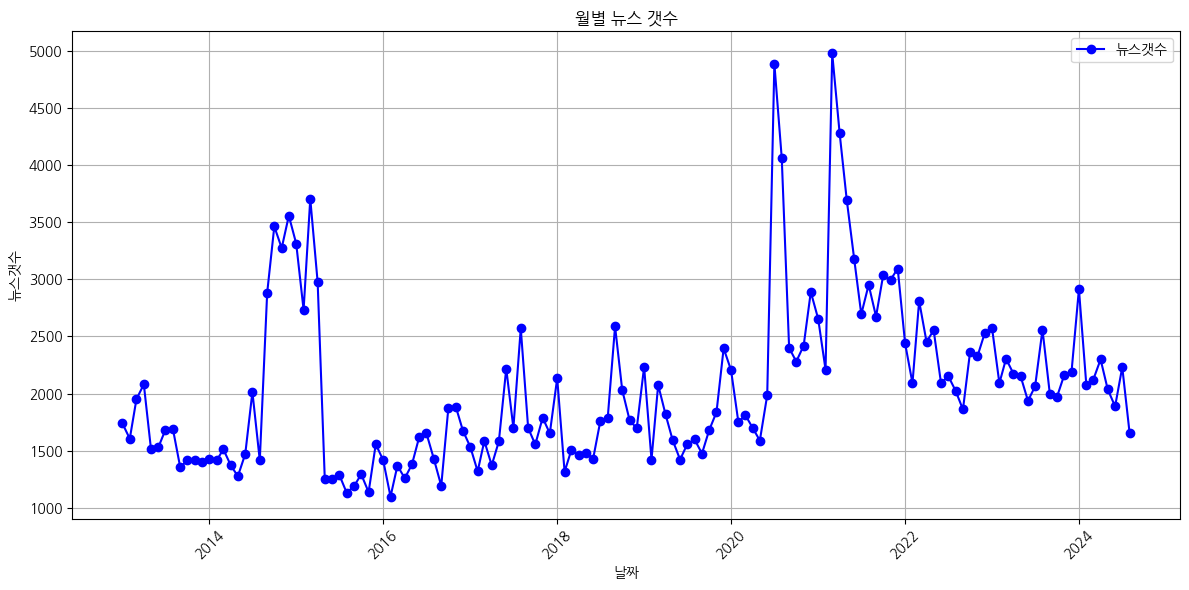

In [92]:
query_news = """
SELECT date, count(date) as count
FROM news_titles_copy
where date
GROUP BY date
"""
df_news = fetch_data(query_news, cursor)

# 데이터 확인
print(df_news)
# 데이터 형식 확인 (필요한 경우)
plt.figure(figsize=(12, 6))
plt.plot(df_news['date'], df_news['count'], marker='o', linestyle='-', color='b', label='뉴스갯수')
plt.title('월별 뉴스 갯수')
plt.xlabel('날짜')
plt.ylabel('뉴스갯수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 전월세전환율

           date  conversion_rate
0    2011-01-01          7.40000
1    2011-02-01          7.40000
2    2011-03-01          7.40000
3    2011-04-01          7.40000
4    2011-05-01          7.40000
..          ...              ...
158  2024-03-01          4.63160
159  2024-04-01          4.65000
160  2024-05-01          4.62463
161  2024-06-01          4.62857
162  2024-07-01          4.61538

[163 rows x 2 columns]


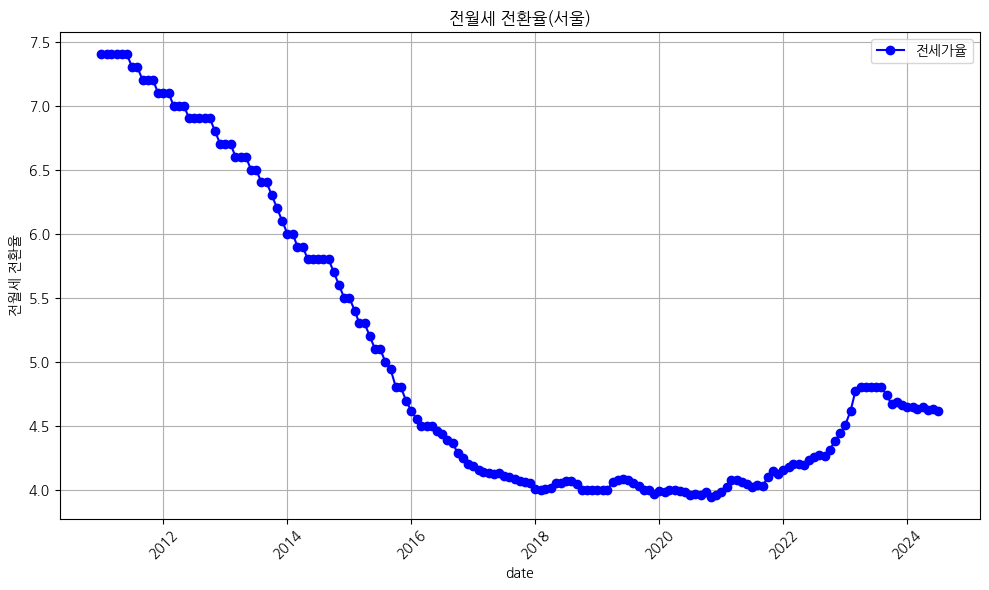

In [93]:
# 전월세전환율
query_rent_conversion_rate = """
SELECT date, conversion_rate
FROM rent_conversion_rate
WHERE region_id LIKE '19'
"""
df_rent_conversion_rate  = fetch_data(query_rent_conversion_rate , cursor)

# 데이터 확인
print(df_rent_conversion_rate )

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가율 
plt.plot(df_rent_conversion_rate ['date'], df_rent_conversion_rate ['conversion_rate'], marker='o', linestyle='-', color='b', label='전세가율')

# 그래프 설정
plt.title('전월세 전환율(서울)')
plt.xlabel('date')
plt.ylabel('전월세 전환율')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()
# 그래프 보여주기
plt.show()

# 미분양

           date  unsold_sum
0    2007-01-01       697.0
1    2007-02-01       590.0
2    2007-03-01       687.0
3    2007-04-01       685.0
4    2007-05-01       704.0
..          ...         ...
206  2024-03-01       968.0
207  2024-04-01       936.0
208  2024-05-01       974.0
209  2024-06-01       959.0
210  2024-07-01       953.0

[211 rows x 2 columns]


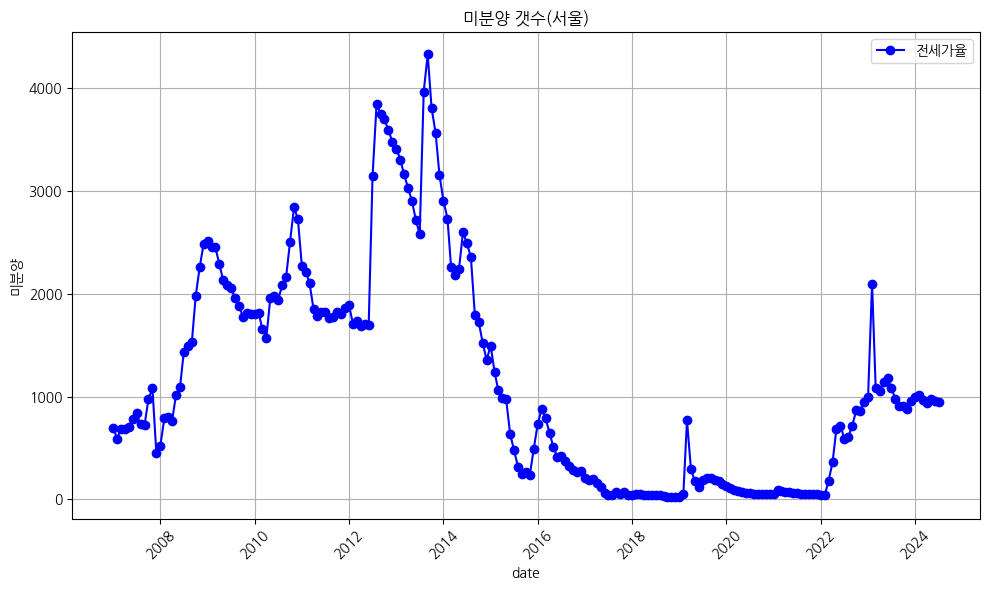

In [94]:
# 미분양
query_unsold_status = """
SELECT date, unsold_sum
FROM unsold_status 
WHERE region_id LIKE '19'
"""
df_unsold_status   = fetch_data(query_unsold_status  , cursor)

# 데이터 확인
print(df_unsold_status)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가율 
plt.plot(df_unsold_status  ['date'], df_unsold_status ['unsold_sum'], marker='o', linestyle='-', color='b', label='전세가율')

# 그래프 설정
plt.title('미분양 갯수(서울)')
plt.xlabel('date')
plt.ylabel('미분양')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()
# 그래프 보여주기
plt.show()

          date  loan_sum
0   2006-01-01  100227.0
1   2007-01-01   98375.1
2   2008-01-01  100189.0
3   2009-01-01  104955.0
4   2010-01-01  109490.0
5   2011-01-01  113511.0
6   2012-01-01  112092.0
7   2013-01-01  113314.0
8   2014-01-01  123840.0
9   2015-01-01  136922.0
10  2016-01-01  150525.0
11  2017-01-01  157613.0
12  2018-01-01  166251.0
13  2019-01-01  178278.0
14  2020-01-01  199946.0
15  2021-01-01  223482.0
16  2022-01-01  228104.0
17  2023-01-01  237254.0


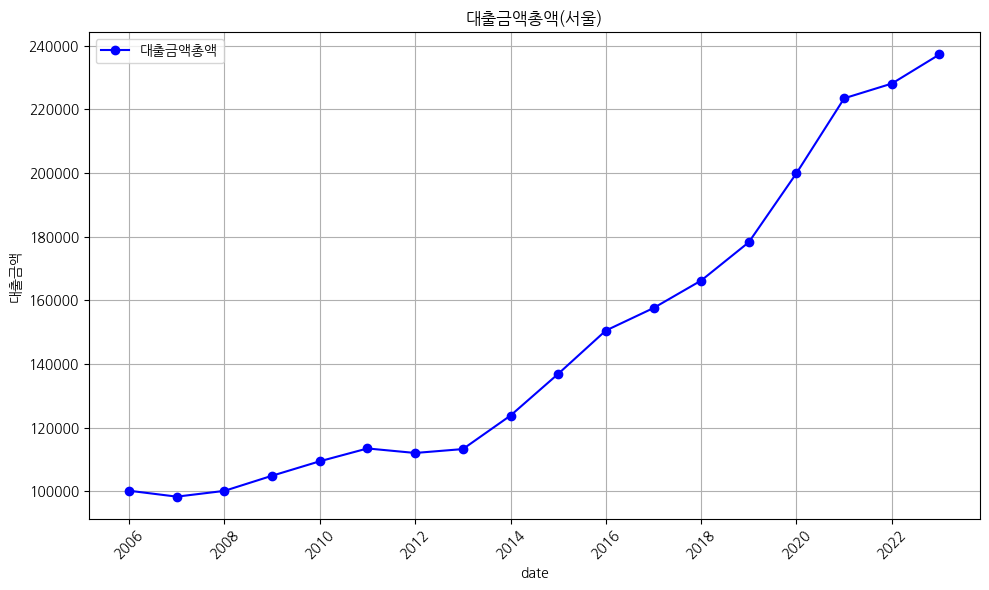

In [97]:
# 대출 금액 총액
query_loan_interest = """
SELECT date, loan_sum
FROM loan_interest
WHERE region_id LIKE '19'
"""
df_loan_interest  = fetch_data(query_loan_interest  , cursor)

# 데이터 확인
print(df_loan_interest)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가율 
plt.plot(df_loan_interest['date'], df_loan_interest['loan_sum'], marker='o', linestyle='-', color='b', label='대출금액총액')

# 그래프 설정
plt.title('대출금액총액(서울)')
plt.xlabel('date')
plt.ylabel('대출금액')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()
# 그래프 보여주기
plt.show()

           date  interest
0    2006-01-01  3.750000
1    2006-02-01  3.928571
2    2006-03-01  4.000000
3    2006-04-01  4.000000
4    2006-05-01  4.000000
..          ...       ...
202  2022-11-01  3.058333
203  2022-12-01  3.250000
204  2023-01-01  3.403226
205  2023-02-01  3.500000
206  2023-03-01  3.500000

[207 rows x 2 columns]


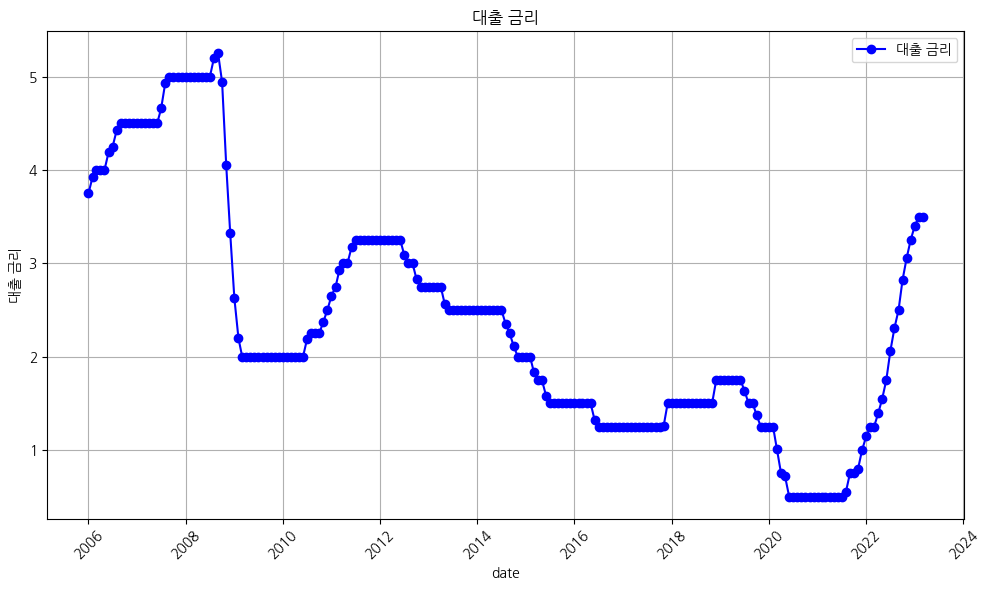

In [96]:
# 대출 금리
query_base_interest = """
SELECT date, AVG(interest) AS interest FROM base_interest_copy
GROUP BY date
"""
df_base_interest = fetch_data(query_base_interest, cursor)

# 데이터 확인
print(df_base_interest)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 대출 금리 
plt.plot(df_base_interest['date'], df_base_interest['interest'], marker='o', linestyle='-', color='b', label='대출 금리')

# 그래프 설정
plt.title('대출 금리')
plt.xlabel('date')
plt.ylabel('대출 금리')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

NameError: name 'connection' is not defined